# Proyecto: Análisis de la temperatura global

Los datos se descargaron de: 

[GlobalLandTemperaturesByCountry.csv](  https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByCountry.csv )

Algunas de las funciones que usamos en este script son:

`.aggregate({ 'selected_column':[funcion_1 ,..., funcion_N] })` <- Permite definir y aplicar una serie de funciones a la columna "selected_column"

`.reset_index()` <- destruye (resetea) el agrupamiento de '.groupby()' conviertiendo los índices como valores de nuevas columnas. 

`.pivot_table(values=' ',index=' ', columns = ' ')` <- Permite construir una nueva tabla cuyos valores, índices y columnas se especifican en: values=' ',index=' ', columns = ' '

`.boxplot()` <- permite graficar el diagrama de caja y bigotes de una tabla

`.sample(N , axis=1)` <- Toma una muestra de N columnas aleatorias de una tabla

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
# Cargamos datos:
df_temp = pd.read_csv('./db/GlobalLandTemperatures/GlobalLandTemperaturesByCountry.csv')

df_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


Extraemos información general de la base de datos:

In [4]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


Cambiamos el tipo de dato de 'dt' al tipo datetime:

In [5]:
df_temp['dt'] =  pd.to_datetime( df_temp['dt'] )

In [6]:
# verificamos que se hayan hecho los cambios
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             577462 non-null  datetime64[ns]
 1   AverageTemperature             544811 non-null  float64       
 2   AverageTemperatureUncertainty  545550 non-null  float64       
 3   Country                        577462 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 17.6+ MB


Obtenemos el número de clases de datos en cada variable:

In [7]:
# Extraemos número de clases de datos en cada variable del dataframe:
df_temp.nunique()

dt                                3239
AverageTemperature               71085
AverageTemperatureUncertainty     8979
Country                            243
dtype: int64

In [9]:
# Agregamos una columna correspondiente al año del registro:
df_temp['year'] =  df_temp['dt'].dt.year

df_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
0,1743-11-01,4.384,2.294,Åland,1743
1,1743-12-01,NaN,NaN,Åland,1743
2,1744-01-01,NaN,NaN,Åland,1744
3,1744-02-01,NaN,NaN,Åland,1744
4,1744-03-01,NaN,NaN,Åland,1744


Analizamos el conteo de registros por año lo cual nos servirá para decidir si usaremos el dataset completo o sólo una parte de este

In [10]:
# Realizamos un conteo de registros agrupados por año
df_temp.groupby(['year'])[['Country']].count()

,Country
year,
1743,100
1744,600
1745,600
1746,600
1747,600
...,...
2009,2916
2010,2916
2011,2916


<AxesSubplot:xlabel='year'>

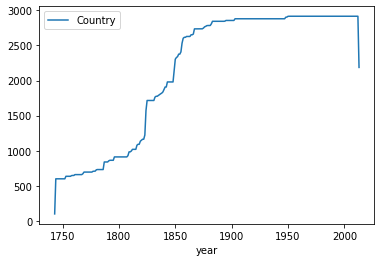

In [11]:
# Graficamos el conteo de registros por año:
df_temp.groupby(['year'])[['Country']].count().plot()

Vemos que tenemos registros desde hace más de 100 años, así que sólo extraemos unicamente los registros a partir de 1970:

In [13]:
df_temp = df_temp[ df_temp['year'] >= 1970 ]

# O también se puede usar:
# df_temp[ df_temp['dt']>='1970-01-01' ]

df_temp.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2714,1970-01-01,-6.495,0.584,Åland,1970
2715,1970-02-01,-10.835,0.478,Åland,1970
2716,1970-03-01,-1.583,0.608,Åland,1970
2717,1970-04-01,0.493,0.463,Åland,1970
2718,1970-05-01,6.939,0.565,Åland,1970


In [14]:
# aplicamos las funciones definidas en '.aggregate({})'(media y mediana)  a la columna 'AverageTemperature', 
# agrupadas por 'Country' y 'dt' (con una frecuecia de año por año: freq='1Y')


df_temp_avg = df_temp.groupby(['Country' , pd.Grouper(key='dt', freq='1Y')]).aggregate({ 'AverageTemperature':[np.mean , np.median] })

# Debido a que la variable 'dt' es del tipo 'datatime', podemos aplicarle 'pd.Grouper(key='dt', freq='1Y')'
# donde " freq='1Y' " indica que el agrupamiento se realice por cada 1 año

# El diccionario en 'aggregate' indica el nombre de la columna y las funciones que se le aplicarán a ésta.

df_temp_avg

AverageTemperature         
                                     mean   median
Country     dt                                    
Afghanistan 1970-12-31          14.783083  15.4710
            1971-12-31          14.823500  14.9340
            1972-12-31          12.547167  13.8725
            1973-12-31          14.235500  14.9130
            1974-12-31          13.316750  13.6160
...                                   ...      ...
Åland       2009-12-31           6.489083   5.5765
            2010-12-31           4.861917   4.7550
            2011-12-31           7.170750   7.4990
            2012-12-31           6.063917   6.2540
            2013-12-31           6.229750   6.0140

[10692 rows x 2 columns]

In [15]:
# Nos restringimos a la información que hay para México:
df_temp_avg.loc['Mexico']

AverageTemperature         
                         mean   median
dt                                    
1970-12-31          20.490083  21.0755
1971-12-31          20.640333  20.6605
1972-12-31          20.975000  22.1485
1973-12-31          20.496167  20.8200
1974-12-31          20.631500  21.0005
1975-12-31          20.449333  20.9585
1976-12-31          20.145667  20.3740
1977-12-31          20.841250  21.0620
1978-12-31          20.755500  21.2615
1979-12-31          20.569000  21.7240
1980-12-31          21.035667  20.7925
1981-12-31          20.753750  21.3770
1982-12-31          21.051083  21.7475
1983-12-31          20.675417  20.8315
1984-12-31          20.511500  21.3755
1985-12-31          20.603917  21.1995
1986-12-31          20.850667  21.6170
1987-12-31          20.455167  20.7800
1988-12-31          20.736083  21.4205
1989-12-31          20.965167  21.5890
1990-12-31          20.960833  21.4460
1991-12-31          20.839667  21.7415
1992-12-31          20.650333  21.2300
1993-12-31          20.938833  21.3560
1994-12-31          21.325750  21.5925
1995-12-31          21.370667  21.4765
1996-12-31          21.132167  21.2680
1997-12-31          20.898583  20.5115
1998-12-31          21.531750  21.7430
1999-12-31          21.128500  21.6755
2000-12-31          21.232083  21.6020
2001-12-31          21.133000  21.8235
2002-12-31          21.225000  22.3760
2003-12-31          21.329417  21.8635
2004-12-31          20.924833  21.5650
2005-12-31          21.413500  21.7915
2006-12-31          21.418083  22.3940
2007-12-31          21.079333  21.5400
2008-12-31          21.085250  21.7885
2009-12-31          21.546083  21.8915
2010-12-31          20.852917  21.3450
2011-12-31          21.599333  22.5915
2012-12-31          21.652417  22.3815
2013-12-31          22.219222  24.1130

Text(0.5, 1.0, 'Registro de temperatura en México')

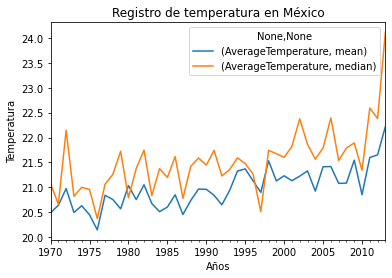

In [16]:
# Graficamos los registros anteriores:
df_temp_avg.loc['Mexico'].plot()

plt.xlabel('Años')
plt.ylabel('Temperatura')
plt.title('Registro de temperatura en México')

In [18]:
df_temp_avg.head()

AverageTemperature         
                                     mean   median
Country     dt                                    
Afghanistan 1970-12-31          14.783083  15.4710
            1971-12-31          14.823500  14.9340
            1972-12-31          12.547167  13.8725
            1973-12-31          14.235500  14.9130
            1974-12-31          13.316750  13.6160

In [20]:
# Extraemos unicamente los registros de la columna ['AverageTemperature'][['median']]
df_temp_avg['AverageTemperature'][['median']]

median
Country     dt                 
Afghanistan 1970-12-31  15.4710
            1971-12-31  14.9340
            1972-12-31  13.8725
            1973-12-31  14.9130
            1974-12-31  13.6160
...                         ...
Åland       2009-12-31   5.5765
            2010-12-31   4.7550
            2011-12-31   7.4990
            2012-12-31   6.2540
            2013-12-31   6.0140

[10692 rows x 1 columns]

In [22]:
# '.reset_index()' destruye el agrupamiento de '.groupby()' conviertiendo los índices 
# como valores de nuevas columnas. 

# En este caso convertimos los multiples índices ('Country' y 'dt') como componentes de columnas

df_temp_median = df_temp_avg['AverageTemperature'][['median']].reset_index()
df_temp_median


,Country,dt,median
0,Afghanistan,1970-12-31,15.4710
1,Afghanistan,1971-12-31,14.9340
2,Afghanistan,1972-12-31,13.8725
3,Afghanistan,1973-12-31,14.9130
4,Afghanistan,1974-12-31,13.6160
...,...,...,...
10687,Åland,2009-12-31,5.5765
10688,Åland,2010-12-31,4.7550
10689,Åland,2011-12-31,7.4990
10690,Åland,2012-12-31,6.2540


In [23]:
# Agregamos una columna correspondiente al año del registro
df_temp_median['year'] = df_temp_median['dt'].dt.year

df_temp_median

,Country,dt,median,year
0,Afghanistan,1970-12-31,15.4710,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [24]:
# Renombramos el nombre de la columna 'median' como 'temperature'

df_temp_median.rename(columns={'median':'temperature'} , inplace=True)

In [25]:
df_temp_median

,Country,dt,temperature,year
0,Afghanistan,1970-12-31,15.4710,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [26]:
# Guardamos este dataframe ya que lo usaremos en la siguiente practica:
# ponemos 'index=False' para que no se agregue una columna de índices

df_temp_median.to_csv('./db/temperatures_median_conutry_year.csv', index=False)

## A continuación mostraremos un boxplot (diagrama de caja y bigotes) para todos los países:

In [29]:
# Creamos una tabla pivote para los valores de la columna 'temperature' donde los índices serán los años y las columnas los paíse:
df_temp_pivot = df_temp_median.pivot_table(values='temperature',index='year', columns = 'Country')

df_temp_pivot.head()

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
year,,,,,,,,,,,,,,,,,,,,,
1970,15.4710,25.0370,12.1245,22.5930,26.8540,10.5155,23.0415,27.0115,26.9065,15.9495,...,16.9310,13.8645,25.1685,24.1580,26.5575,23.2500,26.8605,22.3035,23.3935,4.3175
1971,14.9340,24.7755,11.6735,22.7810,26.4845,11.9275,22.4615,26.5295,26.3810,14.7665,...,16.5470,12.9860,24.6480,24.1105,26.2470,20.2715,26.5130,21.8265,22.7055,4.4870
1972,13.8725,25.1230,11.2175,22.4985,26.8205,10.0250,22.6070,26.9150,26.7700,14.3445,...,16.9190,13.5640,25.2615,24.5165,26.6150,21.3905,26.8175,21.9800,22.3980,5.6200
1973,14.9130,25.3445,11.8370,22.9975,27.0120,9.5525,23.0730,27.3360,27.1725,14.8675,...,17.5420,13.4735,25.2020,25.0080,27.0685,22.9215,27.2265,22.1090,22.5815,3.5795
1974,13.6160,24.8260,11.3210,21.5795,26.6350,8.2045,22.3275,26.6015,26.5190,15.2160,...,17.4025,13.2105,25.0760,24.3700,26.1720,21.5755,26.6320,21.6005,21.3255,5.4550


Text(0, 0.5, 'Temperatura')

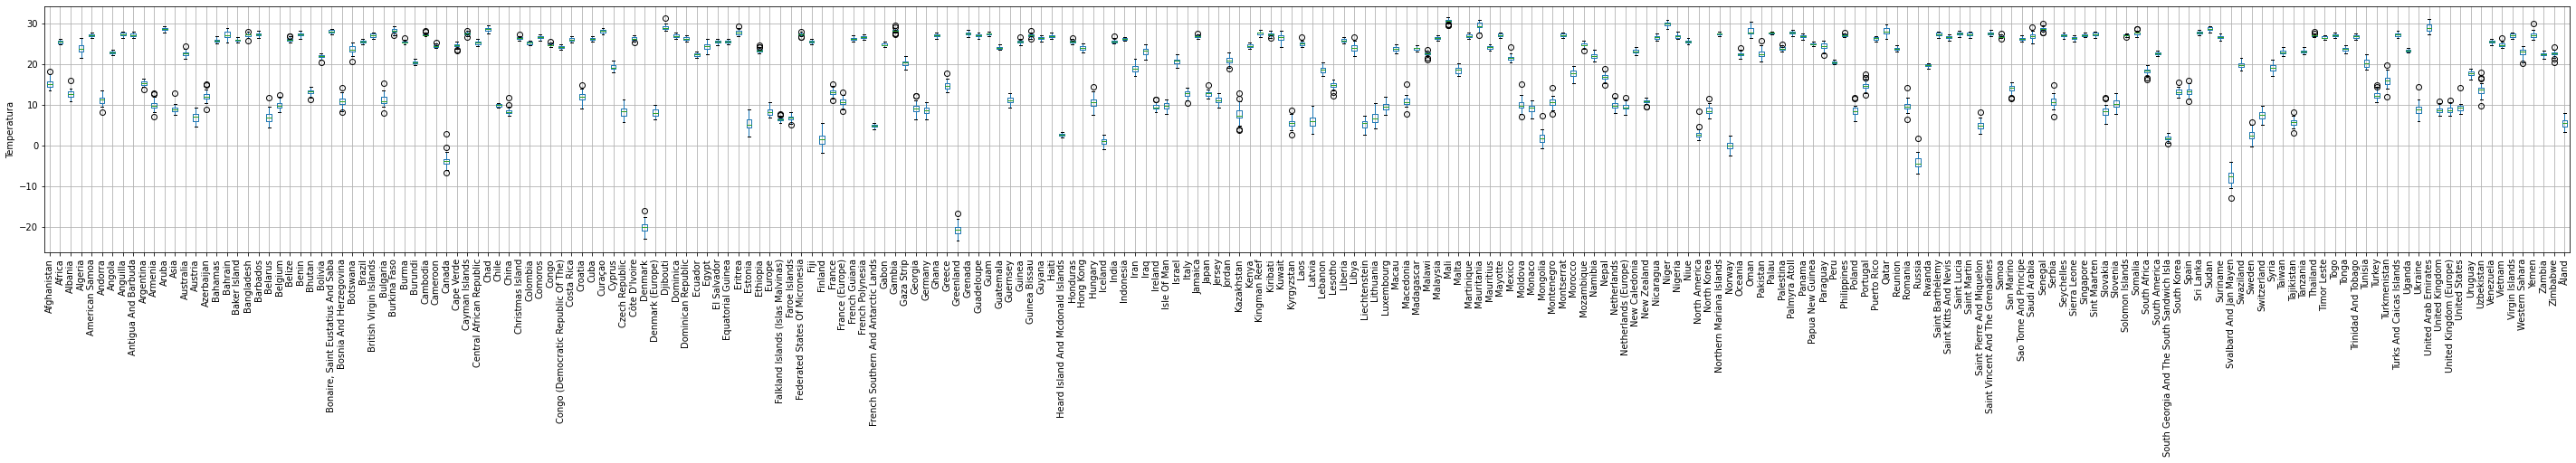

In [30]:
# Hacemos un boxplot de la tabla anterior:

# rot = 90 # <- indica que los labels esten rotados 90 grados

df_temp_pivot.boxplot(figsize=(50,5),rot=90)
plt.ylabel('Temperatura')

Los circulos que se muestran en la gráfica indican los valores atípicos (outliers)

## A continuación mostraremos un boxplot (diagrama de caja y bigotes) únicamente para N (<=10) países seleccionados aleatoriamente:

In [36]:
# Extraemos los registros de N paises de forma aleatoria 
# axis = 0 (default) realiza la selección en los renglones
# axis = 1 realiza la selección en las columnas

N=10

df_N_countries = df_temp_pivot.sample(N , axis=1)
df_N_countries.head()

Country,Ukraine,Åland,Hungary,United Arab Emirates,Italy,Kuwait,Moldova,Tanzania,South Georgia And The South Sandwich Isla,Sierra Leone
year,,,,,,,,,,
1970,8.5635,4.3175,9.4460,28.8180,11.8910,26.5050,9.6535,22.4805,1.2985,26.2245
1971,7.4325,4.4870,9.9265,27.8175,12.5700,24.7155,8.7475,22.3920,1.5420,25.7790
1972,9.0295,5.6200,9.7395,28.0485,11.4625,26.2280,9.9990,22.6910,0.4455,26.1750
1973,8.5070,3.5795,9.0350,28.7285,11.4140,26.7335,9.7585,22.7820,1.6770,26.2960
1974,8.4815,5.4550,8.6055,27.8570,10.2855,25.4995,9.6545,22.3410,1.4885,25.9540


Text(0.5, 1.0, 'Boxplot')

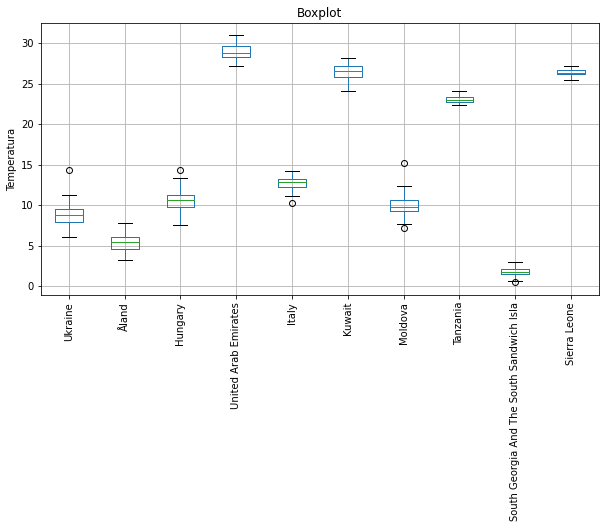

In [38]:
# rotamos los labels para que no se encimen:
df_N_countries.boxplot(figsize=(10,5),rot=90)
plt.ylabel('Temperatura')
plt.title('Boxplot')

Recordemos que las barras horizontales (bigotes) indican el mínimo y máximo de los datos. Los circulos indican outliers (valores atípicos). La barra que esta dentro de las cajas indica la mediana.